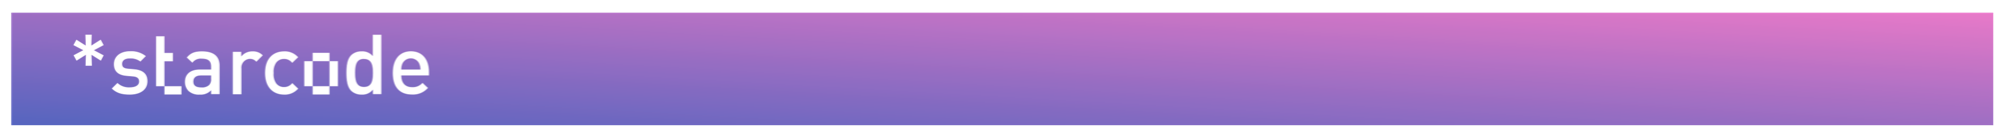

# Woche 10: Nearest Neighbour

In [4]:
#@title Import

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

Letzte Woche haben wir mit Hilfe der Linearen Regression zum Beispiel das Gewicht eines Menschen anhand seiner Körpergröße vorhergesagt. Schauen wir uns nochmal kurz einen Plot dazu an. Was sagt uns die Regressionlinie? 

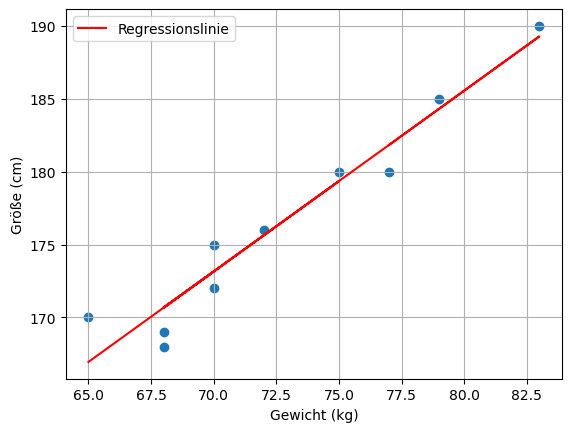

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
weights = np.array([65, 70, 68, 75, 72, 68, 70, 79, 83, 77])
heights = np.array([170, 175, 168, 180, 176, 169, 172, 185, 190, 180])

# Reshape the arrays to match the expected input shape for LinearRegression
X = weights.reshape(-1, 1)
y = heights.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions using the model
predictions = model.predict(X)

# Plot the data and regression line
plt.scatter(weights, heights)
plt.plot(weights, predictions, color='red', label='Regressionslinie')
plt.xlabel('Gewicht (kg)')
plt.ylabel('Größe (cm)')
plt.legend()
plt.grid(True)
plt.show()

Im Unterschied dazu wollen wir uns diese Woche damit beschäftigen, wie man Objekte einer bestimmten Gruppe/ Klasse zuorndet. Dieses Problem nennt man ein Klassifikations-Problem.

Dafür sehen wir uns im Laufe des heutigen Kurses ein paar Planeten and und versuchen sie anhand ihrer Position im Universum zu einem Stern-System (wie unserem Sonnensystem) zuzuordnen.

Die Technik die wir dafür benutzen, nennt sich *Nearest Neighbour* (also Nächster Nachbar). Sie ist eine simple methode um Objekte die durch bestimmte Werte spezifiziert sind, zu einer Gruppe zuzuornden. Man braucht dafür lediglich ein paar Objekte von der die Gruppen-Zugehörigkeit schon bekannt ist (*supervised learning*) und ein bisschen Mathematik.


---



## *Nearest Neighbour* Klassifizierung verstehen

Die *Nearest Neighbour* Methode entscheidet aufgrund von Abständen ob ein Objekt zu der einen Gruppe gehört oder zu der anderen. Deswegen müssen wir uns zu Beginn auf eine Formel einigen, mit der wir den Abstand von zwei Objekten messen.

### Euklidischer Abstand

Die Formel die für Gewöhnlich verwendet wird nennt sich *Euklidische Abstand*, benannt nach dem Mathematiker Euklid, den ihr bestimmt schon aus dem Mathe-Unterricht kennt.

Für den **zwei-dimensional Raum** sieht sie folgndermaßen aus:

$d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2} = \sqrt{\Delta x^2+\Delta y^2} $

Für den **drei-dimensional Raum** dann entsprechend:

$d=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2} = \sqrt{\Delta x^2+\Delta y^2+\Delta z^2}$

In dem folgenen Code-Ausschnitt wird der *Euklische Abstand* von zwei Punkten in der Ebene berechnet. Außerdem werden die Punkte und ihre Verbindung geplottet. Die Linie zwischen den zwei Punkten hat genau die Länge die wir mit dem *Euklischen Abstand* berechnet haben.

**Aufgabe 1.1:** Verändere die Koordniaten von den Punkten und führe den Code-Abschnitt erneut aus. Wie verändert sich der *Euklidische Abstand*?

In [6]:
point1 = [1,3] # Punkt 1
point2 = [2,5] # Punkt 2
euclidean_distance = sqrt( (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 ) # Berechnet den Euklidischen Abstand
print("Der Euklidische Abstand zwischen Punkt 1 und Punkt 2 ist: " + str(euclidean_distance)) # Gibt den Euklidischen Abstand aus


Der Euklidische Abstand zwischen Punkt 1 und Punkt 2 ist: 2.23606797749979


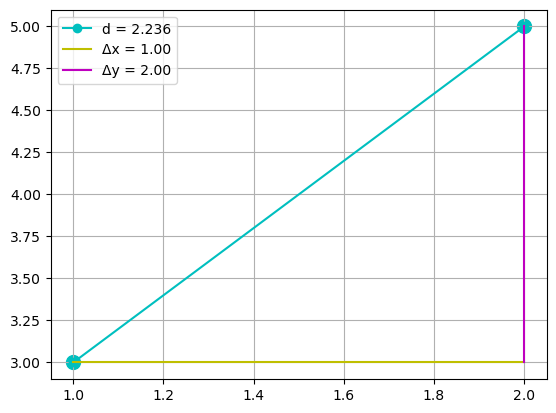

In [7]:
#@title Plot

label = 'd = ' + "{:.3f}".format(euclidean_distance)
plt.plot([point1[0], point2[0]],[point1[1], point2[1]], 'co-', label=label)
label = u'Δx = ' + "{:.2f}".format(point2[0] - point1[0])
plt.plot([point1[0], point2[0]],[point1[1], point1[1]], 'y-', label=label)
label = u'Δy = ' + "{:.2f}".format(point2[1] - point1[1])
plt.plot([point2[0], point2[0]],[point1[1], point2[1]], 'm-', label=label)
plt.scatter([point1[0], point2[0]],[point1[1], point2[1]], s=100, color='c')
plt.legend()
plt.grid(True)

**Aufgabe 1.2:** Berechne den *Euklidischen Abstand* zwischen den zwei drei-dimensionalen Punkten und lasse dir das Ergebnis anzeigen (*Tipp:* Verwende den ``` print() ``` Befehl).



In [8]:
point1 = [1,3,2] # Punkt 1
point2 = [2,5,1] # Punkt 2

# Hier musst du die Formel für den Euklidschen Abstand im drei-dimensional Raum eingeben
euclidean_distance = ...

# Hier musst du die Variable eingeben die ausgegeben werden soll
print(...)

Ellipsis




---


### Du Entdeckst einen unbekannten Planeten

Stell dir vor du hast als du das letzte mal durch dein Fernglas geschaut hast einen neuen Planeten entdeckt von dem niemand wusste, dass es ihn gibt. Weil du's einfach drauf hast, konntest du seine Position im Universum ziemlich genau bestimmen. Du weißt aber leider nicht zu welchen Planeten-System der unbekannte Planet gehört ...

Nun wollen wir die *Nearest Neighbour* Methode nutzen um den von dir neu entdeckten Planeten einem Stern-System zuzordnen. Dafür geben wir erstmal die Koordinaten der Himmelskörper ein, die wir schon kennen und von denen wir wissen zu welchem Planetensystem sie gehören. Das machen wir für die Planeten unseres *Sonnes Systems* und des benachbarten *Alpha Centauri Systems*. Außerdem geben wir noch die Koordnaten des von dir entdeckten unbeannten Planeten ein.

*Anmerkung:* Wir gehen hier von einem vereinfachten zwei-dimensionalen Unsiversum aus. Außerdem sind die Koordnaten der Planeten frei erfunden, also erzähl das lieber nicht im Physik-Unterricht ... Wenn du aber ein bisschen angeben willst kannst du ja erzählen dass das *Alpha Centauri System* das dem *Sonnen System* nächstgelgene Doppel-Stern-System ist. Es besteht (soweit wir heute wissen) aus den zwei Sternen *Alpha Centauri A* und *Alpha Centauri B* und dem Roten Zwerg *Proxima Centauri* der von dem extra-solaren Planeten *Proxima Centauri B* umkreist wird. Noch mehr (un)nützes Wissen gibt es [hier](https://de.wikipedia.org/wiki/Alpha_Centauri).

In [9]:
solar_system = [[1, 2, 3], # x-Koordinaten von drei Himmelskörpern im Sonnen System
                [2, 3, 1]] # y-Koordinaten von drei Himmelskörpern im Sonnen System

alpha_centauri_system = [[6, 7, 8], # x-Koordinaten von drei Himmelskörpern im Alpha Centauri System
                         [5, 7, 8]] # y-Koordinaten von drei Himmelskörpern im Alpha Centauri System

unknown_planet = [5,7] # x- und y-Koordinaten von dem neu endeckten Planeten

Um ein Gefühl dafür zu bekommen, zu welchem System der unbekannte Planet gehört, plotten wir alle bekannten Planeten und den neu entdeckten planeten in einem zwei-dimensionalen Koordinaten System.

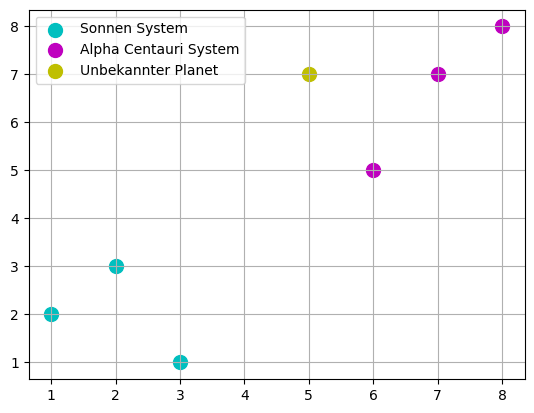

In [10]:
#@title Plot

plt.scatter(solar_system[0], solar_system[1], s=100, color='c', label='Sonnen System')
plt.scatter(alpha_centauri_system[0], alpha_centauri_system[1], s=100, color='m', label='Alpha Centauri System')
plt.scatter(unknown_planet[0], unknown_planet[1], s = 100, color='y', label='Unbekannter Planet')
plt.legend()
plt.grid(True)

**Aufgabe 1.3:** Schätze ab, zu welchem System der neue Planet wahrscheinlich gehört. Wenn du eine Vermutung hast, überlege auf welcher Grundlage du deine Einschätzung triffst. Wieso gehört er deiner Meinung nach zu dem einen Planeten System und nicht zu dem anderen?



---


### Zuordnung des neuen Planeten zu bekannten Stern-System

Wir haben uns jetzt also einen Eindruck davon gemacht wo der neue Planet sich befindet und vielleicht sogar schon eine Vermutung zu welchem Stern-System er gehört.

Um den neuen Planeten nun mit Hilfe der *Nearest Neighbour* Methode einem Stern-System zuzuteilen, müssen wir die euklidischen Abstände von jedem bekannten Himmelskörper zu dem neu entdeckten Planeten berechnen. Zudem speichern wir zu jedem Abstand den Namen des dazugehörigen Stern-Systems. Die euklidschen Abstände sind im nachfolgenden Plot eingezeichnet.

In [11]:
# Hier werden die Euklidischen Abstände der Himmelskörper von dem unbekannten Planeten ermittelt

distances_and_labels = [] # neues Abstand-und-Label-Array initialisieren

for i in range(0, len(solar_system[0])): # itert über alle Objekte im Sonnen-System Array
    euclidean_distance = sqrt( (solar_system[0][i]-unknown_planet[0])**2 + (solar_system[1][i]-unknown_planet[1])**2 ) # berechnet den euklidschen Abstand
    distances_and_labels.append([euclidean_distance, "Sonnen System"]) # fügt den Abstand und die Bezeichnung des Stern-Systems zum Array hinzu

for j in range(0, len(alpha_centauri_system[0])): # itert über alle Objekte im Alpha-Centauri-System Array
    euclidean_distance = sqrt( (alpha_centauri_system[0][j]-unknown_planet[0])**2 + (alpha_centauri_system[1][j]-unknown_planet[1])**2 )  # berechnet den euklidschen Abstand
    distances_and_labels.append([euclidean_distance, "Alpha Centauri System"]) # fügt den Abstand und die Bezeichnung des Stern-Systems zum Array hinzu

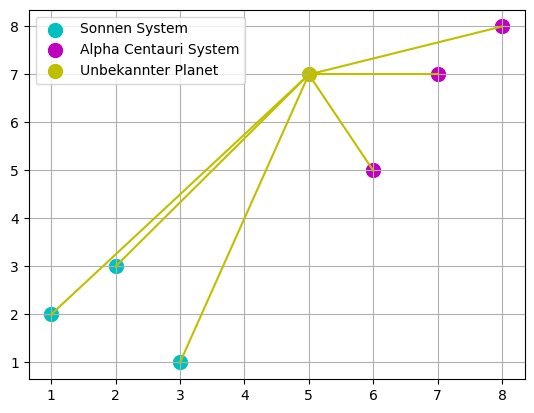

In [12]:
#@title Plot

plt.scatter(solar_system[0], solar_system[1], s=100, color='c', label='Sonnen System')
plt.scatter(alpha_centauri_system[0], alpha_centauri_system[1], s=100, color='m', label='Alpha Centauri System')
plt.scatter(unknown_planet[0], unknown_planet[1], s = 100, color='y', label='Unbekannter Planet')
for i in range(0, len(solar_system[0])):
  plt.plot([solar_system[0][i], unknown_planet[0]], [solar_system[1][i], unknown_planet[1]], 'y-')
for j in range(0, len(alpha_centauri_system[0])):
  plt.plot([alpha_centauri_system[0][j], unknown_planet[0]], [alpha_centauri_system[1][j], unknown_planet[1]], 'y-')
plt.legend()
plt.grid(True)

Aus der Liste der Abstände wählen wir nun diejenigen aus, mit dem geringsten Abstand zu dem neuen Planeten. In diesem Beispiel wählen wir die drei nächsgelegenen aus. Man könnte auch die fünf nächstgelegenen wählen ... in unserem Beispiel ist es nur wichtig eine ungerade Anzahl an nächsten Nachbarn zu wählen. Da wir die drei nächstgelegenen Objekte für die Klassifizierung heranziehen, nennt sich die Methode in diesem Fall auch *3-Nearest Neighbour*.

**Aufgabe 1.4:** Überlege, wieso eine gerade Anzahl an nächsten Nachbarn (also bspw. ```k=2```) zu Problemen führen kann bei der Klassifizierung mit Hilfe der *Nearest Neighbour* Methode.

In [13]:
# Hier werden die Stern-Systeme der drei nächstgelegenen Himmelskörper ermittelt
k = 3
nearest_neighbours = [l[1] for l in sorted(distances_and_labels)[:k]]
print(nearest_neighbours)

['Alpha Centauri System', 'Alpha Centauri System', 'Alpha Centauri System']


**Aufgabe 1.5:** Verändere die obigen Code-Abschnitt so, dass dir die Stern-Systeme der fünf nächstgelgenen Himmelskörper ausgegeben werden.

Wir haben die Stern-Systeme der drei Himmelskörper ermittelt, die dem neuen Planeten am nächsten liegen. Wenn du den obigen Code-Abschnitt ausführst, kannst du sehen zu welchem Stern-System die Himmelskörper gehören, die dem unbekannten Planeten am nächsten sind.

Nun müssen wir nurnoch zählen, welches Stern-System am häufisten vorkommt um herauszufinden, zu welchem Stern-System der unbekannte Planet gehört.

In [14]:
# Hier wird die Gruppe ermittelt zu der der Neue Punkt gehört
result = Counter(nearest_neighbours).most_common(1)[0][0]
print(result)

Alpha Centauri System


Und hier haben wir die Anwort! Der Planet von dem wir nicht wussten zu welchem Stern-System er gehört, wurde dem *Alpha Centauri System* zugeordnet, da seine nächsten Nachbarn auch zum *Alpha Centauri System* gehören.

War das auch deine Vermutung? Wahrscheinlich schon - denn die *Nearest Neighbour* Methode tut genau das, was wir im Kopf auch machen: Wir schauen uns an zu welcher Gruppe die Objekte gehören, die dem unbekannten Objekt am nächsten sind. Wenn die meisten Objekte in der Umgebung zu einer bestimmten Gruppe gehören, wie in unserem Beispiel, dann teilen wir das unbekannte Objekt ganz einfach dieser Gruppe zu.

Jetzt plotten wir alle Himmelskörper noch einmal. Diesmal teilen wir den neu entdeckten Planeten gleich dem *Alpha Centauri System* zu:

In [15]:
alpha_centauri_system[0].append(unknown_planet[0])
alpha_centauri_system[1].append(unknown_planet[1])


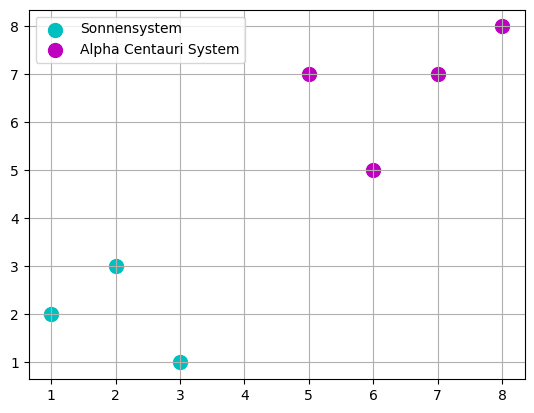

In [16]:
#@title Plot

plt.scatter(solar_system[0], solar_system[1], s=100, color='c', label='Sonnensystem')
plt.scatter(alpha_centauri_system[0], alpha_centauri_system[1], s=100, color='m', label='Alpha Centauri System')
plt.legend()
plt.grid(True)

**Aufgabe 1.6:** Verändere die Koordinaten des `unknown_planet` so, dass er nicht dem *Alpha Centauri System* sondern dem *Sonnen System* zugeorndet wird. Tipp: dafür muss du zu dem Code-Abschnitt hoch-scrollen, wo die Variable `unknown_planet` deklariert wird.



---


## Bibliothek für NN-Klassifizierung benutzen

Nachdem wir das Grundprinzip der *k-Nearest Neighbour* Methode kennengelernt haben, wollen wir uns jetzt noch ansehen wie die Methode in der Praxis angewandt wird. Wie so oft in `Python`, muss man nicht alles selbst programmieren, wie wir es gerade gemacht haben, sondern man kann ganz einfach eine Bibliothek benutzen, in der die gewünschte Funktion schon implementiert ist.



---

### Scikit Learn Bibliothek

Eine im maschinellen Lernen häufig verwendete Bibliothek nennt sich *scikit learn* (`sklearn`). Sie enhält viele Funktionen die man benötigt um *Machine Learning* Methoden anzuwenden. Das Paket welches wir für die *Nearest Neighbour* Methode brauchen heißt `sklearn.neighbours`. Darin liegt die Methode [KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#), welche wir zu Beginn importieren:

In [17]:
from sklearn.neighbors import KNeighborsClassifier



---

### Bekannte und unbekannte Himmelskörper und ihre Stern-Systeme

Jetzt deklarieren wir unsere bekannten Himmelskörper in einem Array und ihre
dazugehörigen Stern-Systeme in einem weiteren Arrays.

Die ersten drei Himmelskörper gehören zum *Sonnen System*, die nächsten vier zum *Alpha Centauri System* und die letzten drei sind Teil des *Barnards Pfeilstern Systems*. Auch hier sind die Koordinaten wieder frei erfunden. Mehr Infos zu *Barnards Pfeilstern* gibt es [hier](https://de.wikipedia.org/wiki/Barnards_Pfeilstern).

In [18]:
known_planets = [[1, 2], # Planet 1
                 [2, 3], # Planet 2
                 [3, 1], # Planet 3
                 [6, 5], # Planet 4
                 [7, 7], # Planet 5
                 [8, 8], # Planet 6
                 [5, 7], # Planet 7
                 [8, 1], # Planet 8
                 [9, 2], # Planet 9
                 [9, 0]] # Planet 10

star_systems = ['Solar System', # Stern-System von Planet 1
                'Solar System', # Stern-System von Planet 2
                'Solar System', # Stern-System von Planet 3
                'Alpha Centauri System', # Stern-System von Planet 4
                'Alpha Centauri System', # Stern-System von Planet 5
                'Alpha Centauri System', # Stern-System von Planet 6
                'Alpha Centauri System', # Stern-System von Planet 7
                'Barnards Pfeilstern System', # Stern-System von Planet 8
                'Barnards Pfeilstern System', # Stern-System von Planet 9
                'Barnards Pfeilstern System'] # Stern-System von Planet 10

Zusätzlich deklarieren wir uns noch zwei zusätzliche Himmelskörper von denen wir nicht wissen zu welchem Sternsystem sie gehören.

In [19]:
unknown_planets = [[4,3], # Planet 11
                   [7,3]] # Planet 12

Wie zuvor, schauen wir uns das ganze erstmal im zwei-dimensionalen Plot an. Die zwei roten Punkte stellen die zwei unbekannten Planeten dar und die Anderen Farben stellen die drei bekannten Stern Systeme dar.

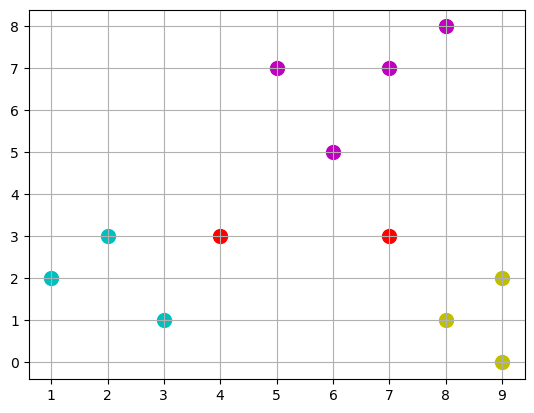

In [20]:
#@title Plot

for i in range(0, len(known_planets)):
  if star_systems[i] == 'Solar System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='c')
  if star_systems[i] == 'Alpha Centauri System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='m')
  if star_systems[i] == 'Barnards Pfeilstern System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='y')
for i in range(0, len(unknown_planets)):
  plt.scatter(unknown_planets[i][0], unknown_planets[i][1], s=100, color='r')
plt.grid(True)

Jetzt ist es schon nichtmehr ganz so offensichtlich zu welchem Stern-System die roten Punkte gehören. Gerade der rechte rote Planet scheint fast gleichweit von dem *Alpha Centauri System* und dem *Barnards Pfeilstern Systems* entfernt zu sein.




---

### Benutze Scikit Learn Bibliothek für Klassifizierung

Wir benutzen jetzt den [KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#) um die *Nearest Neighbour* Methode anzuwenden. Erst wird das `NN_classifier` Objekt instanziiert und dann mit den Daten unserer drei Stern-Systeme angelernt. Dafür verwenden wir die [fit()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit) Methode:

In [21]:
NN_classifier = KNeighborsClassifier() # instanziiert den Nearest Neighbour Classifier
NN_classifier.fit(known_planets, star_systems) # lernt den Classifier auf Daten an

KNeighborsClassifier()

Der `NN_classifier` ist neun also mit den bekannten Planeten-Daten angelernt und kann verwendet werden um neue Planeten den existierenden Stern-Systemen zuzuordnen:

In [22]:
prediction = NN_classifier.predict(unknown_planets) # klassifiziert die zwei unbekannten Planeten zu jeweils einem Sternsystem
print(prediction) # gibt die zwei Stern-Systeme der zwei unbekannten Planeten aus

['Solar System' 'Barnards Pfeilstern System']


Damit haben wir schon unsere Antwort: Der erste unbekannte Planet (`Planet 11`) gehört zu unserem *Sonnen Systen* und der zweite unbekannte Planet (`Planet 12`) gehört zu *Barnards Pfeilstern System*.

Nun schauen wir uns nochmal die drei Stern-Systeme im zwei-dimensionalen Plot an. Darin sind die zuvor unkbekannten Planeten jetzt den richtgen Stern-Systemen zugorndet.

In [23]:
for planet in unknown_planets: # iteriert über alle unbekannten Planeten
  known_planets.append(planet) # fügt unbekannten Planet zu bekannten Planeten hinzu
for system in prediction: # iteriert über alle ermittelten Stern-Systeme der unbekannten Planeten
  star_systems.append(system) # fügt ermitteltes Stern-System zu bekannten Stern-Systemen hinzu

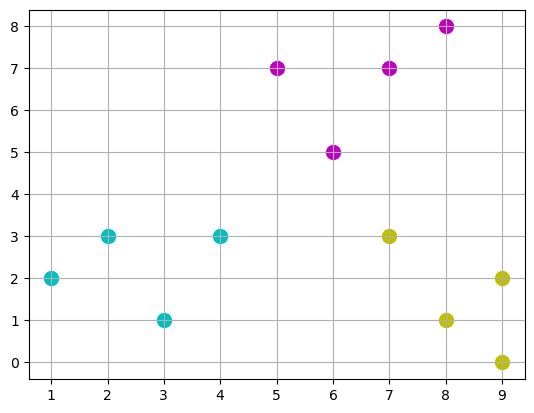

In [24]:
#@title Plot

for i in range(0, len(known_planets)):
  if star_systems[i] == 'Solar System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='c')
  if star_systems[i] == 'Alpha Centauri System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='m')
  if star_systems[i] == 'Barnards Pfeilstern System':
    plt.scatter(known_planets[i][0], known_planets[i][1], s=100, color='y')
plt.grid(True)

**Aufgabe 2:**

*   Überlege dir ein weiteres Stern-System und die Korrdinaten von drei dazugörige Himmelskörper. Füge diese zu den Listen `known_planets` und `star_systems` hinzu
*   Ersetzte die zwei alten unbekannten Planeten in `unknown_planets` durch einen neuen unbekannten Planeten
*   Instanziiere einen neuen *Nearest Neighbour* Klassifizierer und lernen ihn auf den erweiterten Daten an
*   Klassifiziere den unbekannten Planeten mit hilfe des angelernten Klassifizieres



In [28]:
# kopiere den Code aus (lösche die drei Anführungszeichen am Anfang und am Ende) und füge deine Lösung ein
"""
new_known_planets = [...] # hier müssen die Neuen Himmelskörper deklariert werden
for new_planet in new_known_planets:
  known_planets.append(...) # hier müssen die neuen Himmelskörper zu der Liste der bekannten hinzugefügt werden
  star_systems.append(...) # hier muss der Name des enuen Sternsystems hin

unknown_planets = [...] # hier muss der neue unbekannte Planet hin

NN_classifier = ... # hier muss das classifier-objekt instanziiert werden
NN_classifier.fit( ... ) # hier muss das classifier-objekt angelernt werden

prediction = ... # hier muss ddas Stern-System des unbekannten Planeten ermittelt werden
print(prediction)
"""

'\nnew_known_planets = [...] # hier müssen die Neuen Himmelskörper deklariert werden\nfor new_planet in new_known_planets:\n  known_planets.append(...) # hier müssen die neuen Himmelskörper zu der Liste der bekannten hinzugefügt werden\n  star_systems.append(...) # hier muss der Name des enuen Sternsystems hin\n\nunknown_planets = [...] # hier muss der neue unbekannte Planet hin\n\nNN_classifier = ... # hier muss das classifier-objekt instanziiert werden\nNN_classifier.fit( ... ) # hier muss das classifier-objekt angelernt werden\n\nprediction = ... # hier muss ddas Stern-System des unbekannten Planeten ermittelt werden\nprint(prediction)\n'

**Abschlussaufgabe**: Überlege dir nochmal was der Unterschied zwischen den beiden Algotihmen, die du kennengelernt hast, ist. Für was nutzt du eine lineare Regression? Wofür den Nearest Neighbor Algorithmus? 

Herzlichen Glückwunsch! Jetzt hast du einen Einblick in Python und KI gewonnen und schon super viel selber programmiert. 